In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import chain
%matplotlib inline

In [30]:
df = pd.read_pickle('./prd_sample.pkl')
df = df.drop(['term_vectors'], axis=1).reset_index(drop=True)
df.head()

,best_flag,cus_grade,score,text,sorted_terms
0,None,SS,100,디자인ㆍ품질 다좋은데 여유감이 없네요\n55싸이즈인데 팔부분이 좀 끼이네요,"[디자인, ㆍ품질, 좋, 여유, 없, 55, 싸이, 즈이, 데, 팔, 부분, 끼이]"
1,None,SS,95,디자인은 괜찮은데 충전재가 좀 빈약하네요 ㅠㅠ,"[디자인, 괜찮, 충전, 재, 빈약, ㅠㅠ]"
2,None,DD,100,반사이즈 작게 하니 딱 맞네요. 적당히 가볍고 처음 신어도 전혀 불편함이 없네요,"[반, 사이즈, 작, 하, 맞, 가볍, 처음, 신어, 불편, 없]"
3,None,SS,100,사이즈가 커서 내년에 입혀야겠어요,"[사이즈, 크, 내년, 입히, 하]"
4,None,SS,100,아이가 좋아합니다.,"[아이, 좋, 하]"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87889 entries, 0 to 87888
Data columns (total 5 columns):
best_flag       2453 non-null object
cus_grade       87889 non-null object
score           87889 non-null int64
text            87888 non-null object
sorted_terms    87769 non-null object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [32]:
df = df.dropna(subset=['sorted_terms']).reset_index(drop=True)

In [33]:
df['len_terms'] = df.sorted_terms.apply(lambda sorted_term: len(sorted_term))

In [34]:
# best prd_review
df_best = df.dropna(subset=['best_flag'])

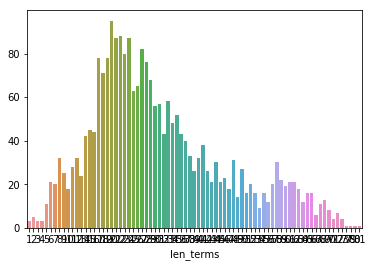

In [35]:
sns.barplot(x=df_best.groupby(by=['len_terms']).size().index, y=df_best.groupby(by=['len_terms']).size())

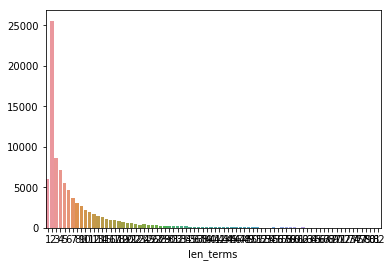

In [36]:
sns.barplot(x=df.groupby(by=['len_terms']).size().index, y=df.groupby(by=['len_terms']).size())

In [36]:
df.groupby(by=['len_terms']).size()

count       80.00000
mean      1097.11250
std       3228.64596
min          1.00000
25%         43.75000
50%         92.50000
75%        570.75000
max      25549.00000
dtype: float64

In [139]:
# 1 : len_terms 5 이상 / score 90,95,100
df_positive = df.loc[(df.len_terms>5)& (df.score > 89)]

In [140]:
df_positive['y'] = 1
df_positive = df_positive[['text', 'sorted_terms', 'y']]

/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
# 0 : len_terms 5 이상 / score <= 75
df_negative = df.loc[(df.len_terms>5)  & (df.score <= 75)]

In [142]:
df_negative['y'] = 0
df_negative = df_negative[['text', 'sorted_terms', 'y']]

/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_train = df_positive.append(df_negative)

In [144]:
df_train.to_pickle('df_train.pkl')

In [77]:
text = df_train.sorted_terms.tolist()

In [91]:
word_count = dict()

for word in chain(*text):
    if not word in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1

In [101]:
df_word_count = pd.DataFrame(data={'word':list(word_count.keys()), 'cnt':list(word_count.values())})
df_word_count = df_word_count.sort_values(by=['cnt'], ascending=False).reset_index(drop=True)

In [114]:
df_vocabulary = df_word_count.loc[df_word_count.cnt > 10].reset_index()

In [118]:
df_vocabulary = df_vocabulary.rename({'index':'idx'}, axis=1)[['idx', 'word']]
df_vocabulary['idx'] = df_vocabulary['idx'] + 1

In [120]:
vocabulary = dict()
vocabulary_inv = dict()

In [122]:
def set_vocab(row):
    vocabulary[row.word] = row.idx
    vocabulary_inv[row.idx] = row.word

vocabulary['UNK'] = 0
vocabulary[0] = 'UNK'

df_vocabulary.apply(lambda row: set_vocab(row), axis=1)

In [133]:
def terms_to_seq(terms_list):
    seq_list = []
    for term in terms_list:
        seq_list.append(vocabulary.get(term, 0))
    return np.array(seq_list)

df_train['seq'] = df_train.sorted_terms.apply(lambda terms_list: terms_to_seq(terms_list))